In [20]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
import seaborn as sns

In [21]:
universal_sentence_encoder_path = '../../modules/modules_useT'

In [22]:
embed = hub.KerasLayer(universal_sentence_encoder_path)

In [23]:
messages = ["What's up?",
 'It is a pleasure to meet you.',
 'How do you do?',
 'Top of the morning to you!',
 'Hi',
 'How are you doing?',
 'Hello',
 'Greetings!',
 'Hi, How is it going?',
 'Hi, nice to meet you.',
 'Nice to meet you.']

In [24]:
embeddings = embed(messages)

In [25]:
print(embeddings)

tf.Tensor(
[[ 0.00941254  0.06349199 -0.06390752 ... -0.03494834 -0.01610694
  -0.02291143]
 [ 0.03658858  0.05755007  0.01436746 ... -0.00793318 -0.01663517
  -0.03814507]
 [ 0.01455948 -0.01014404  0.02419736 ... -0.01305595 -0.04270129
   0.00021355]
 ...
 [ 0.01832285  0.05100035 -0.00788906 ... -0.03733458 -0.02470639
  -0.00664649]
 [ 0.01150784  0.08523271 -0.05310749 ... -0.02527419  0.03552414
  -0.03042457]
 [ 0.01539048  0.07304592 -0.02831994 ... -0.00993429  0.01973454
  -0.03134624]], shape=(11, 512), dtype=float32)


In [26]:
# Eager executing : no session required.
tf.executing_eagerly()

True

In [27]:
for i, m_embedding in enumerate(np.array(embeddings).tolist()):
    print("Message:{}".format(messages[i]))
    print("Embedding Size:{}".format(len(m_embedding)))
    m_embedding_snip = ", ".join(str(x) for x in m_embedding[:3])
    print("Embedding[{},...]\n".format(m_embedding_snip))

Message:What's up?
Embedding Size:512
Embedding[0.009412537328898907, 0.06349198520183563, -0.06390751898288727,...]

Message:It is a pleasure to meet you.
Embedding Size:512
Embedding[0.036588575690984726, 0.05755006521940231, 0.014367458410561085,...]

Message:How do you do?
Embedding Size:512
Embedding[0.01455947570502758, -0.010144037194550037, 0.024197358638048172,...]

Message:Top of the morning to you!
Embedding Size:512
Embedding[0.03125331550836563, 0.0606250986456871, -0.030585046857595444,...]

Message:Hi
Embedding Size:512
Embedding[-0.003373650135472417, 0.07936657965183258, -0.06529629975557327,...]

Message:How are you doing?
Embedding Size:512
Embedding[0.026128582656383514, 0.029318230226635933, 0.03938567638397217,...]

Message:Hello
Embedding Size:512
Embedding[-0.00532323494553566, 0.07886606454849243, -0.07130349427461624,...]

Message:Greetings!
Embedding Size:512
Embedding[0.01892239972949028, 0.07355650514364243, -0.05633337423205376,...]

Message:Hi, How is it 

In [28]:
np.inner(embeddings,embeddings)

array([[ 0.9999995 ,  0.05769191,  0.43084842,  0.36049935,  0.6761881 ,
         0.6618389 ,  0.644861  ,  0.49546823,  0.63699937,  0.3985484 ,
         0.32217517],
       [ 0.05769191,  0.9999996 , -0.03647837,  0.17722961,  0.2118994 ,
         0.11429065,  0.2217311 ,  0.333018  ,  0.18992493,  0.6579154 ,
         0.74153364],
       [ 0.43084842, -0.03647837,  0.9999997 ,  0.10972036,  0.39964217,
         0.6161463 ,  0.36173743,  0.2708665 ,  0.5006411 ,  0.1339585 ,
         0.15335914],
       [ 0.36049935,  0.17722961,  0.10972036,  1.        ,  0.3613341 ,
         0.26887566,  0.35621732,  0.3598526 ,  0.2839734 ,  0.37136167,
         0.34101677],
       [ 0.6761881 ,  0.2118994 ,  0.39964217,  0.3613341 ,  0.9999999 ,
         0.503978  ,  0.97670215,  0.82370925,  0.5887479 ,  0.6786738 ,
         0.5430665 ],
       [ 0.6618389 ,  0.11429065,  0.6161463 ,  0.26887566,  0.503978  ,
         0.9999999 ,  0.46862927,  0.3693533 ,  0.8469501 ,  0.37255734,
         0.342

In [29]:
text_str = 'Hey there, Hows it going ?'
test_emb = embed([text_str])

In [30]:
matrix = np.inner(test_emb, embeddings)

In [31]:
matrix

array([[0.67118275, 0.17735454, 0.44625303, 0.31420344, 0.58896923,
        0.8384197 , 0.57809126, 0.42891076, 0.95193887, 0.517262  ,
        0.41460603]], dtype=float32)

In [32]:
matrix.max()

0.95193887

In [33]:
messages[np.argmax(matrix)]

'Hi, How is it going?'

In [34]:
def plot_similarity(lables, features, rotation):
    corr = np.inner(features, features)
    sns.set(font_scale=1.2)
    '''vmax, vmin: Values to anchor the colormap, otherwise they are inferred from the data and other keyword arguments'''
    '''cmap : colormap with Yellow Green and Blue only'''
    g = sns.heatmap(corr, 
                    xticklabels=lables,
                    yticklabels=lables,
                    vmin=0, 
                    vmax=1,
                    cmap="YlGnBu") 
    g.set_xticklabels(lables,rotation=rotation)
    g.set_title('1. Semantic Textual Similarity')


def run_and_plot(messages_):
    message_embeddings=embed(messages_)
    plot_similarity(messages_, message_embeddings, 90)

In [35]:
def plot_similarity_corr(lablesX, labelsY, corr, rotation, annot= False):
    sns.set(font_scale=1.2)
    g = sns.heatmap(corr, 
                    xticklabels=lablesX,
                    yticklabels=labelsY,
                    vmin=0, 
                    vmax=1,
                    cmap="YlGnBu",
                    annot = annot) 
    g.set_title('2. Semantic Textual Similarity Comparison Single Sentence')

def run_and_plot_single(test_string, compare_to_list, annot):
    test_string_embeddings = embed([test_string])
    compare_to_list_embeddings = embed(compare_to_list)
    plot_similarity_corr([test_string], compare_to_list, np.inner(compare_to_list_embeddings, test_string_embeddings), 90, annot)

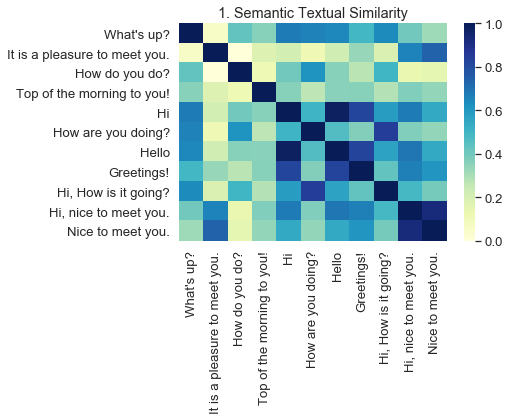

In [36]:
run_and_plot(messages)

In [37]:
embeddings.shape

TensorShape([11, 512])

In [38]:
test_emb.shape

TensorShape([1, 512])

In [39]:
np.inner(embeddings, test_emb)

array([[0.67118275],
       [0.17735454],
       [0.44625303],
       [0.31420344],
       [0.58896923],
       [0.8384197 ],
       [0.57809126],
       [0.42891076],
       [0.95193887],
       [0.517262  ],
       [0.41460603]], dtype=float32)

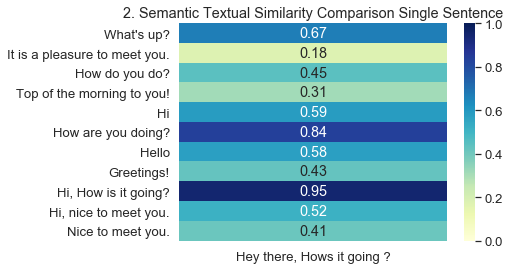

In [40]:
run_and_plot_single(text_str, messages, True)

So our text string (<i>Hey there, Hows it going?</i>) is <b>most</b> closely related to <i>Hi, How is it going?</i>

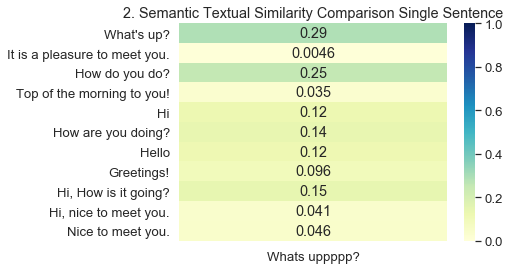

In [41]:
run_and_plot_single("Whats uppppp?", messages, True)

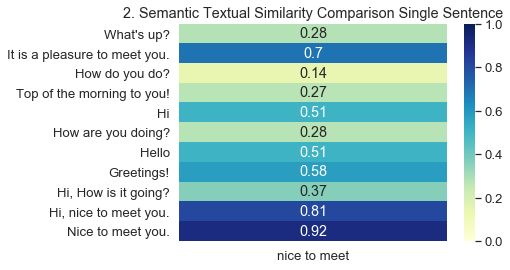

In [42]:
run_and_plot_single("nice to meet", messages, True)

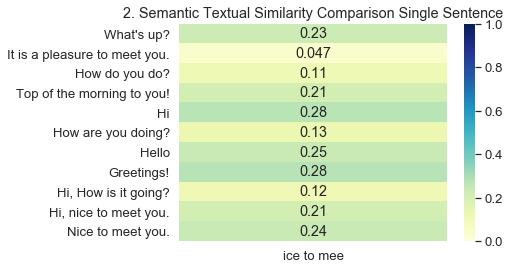

In [43]:
# if we remove 'n' and 't', very intelligently there is very insignificant correlation to any of greetings
run_and_plot_single("ice to mee", messages, True)

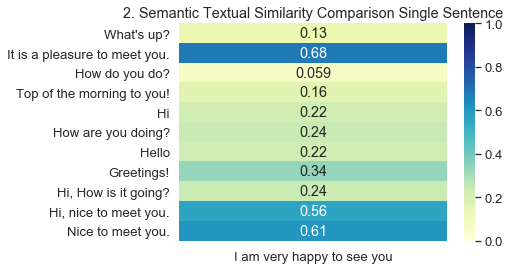

In [44]:
run_and_plot_single("I am very happy to see you", messages, True)